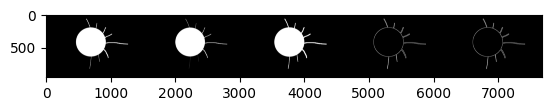

In [53]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

img=cv2.imread("/home/liyuxuan/vscode/res/corrosion.jpg")
kn1=np.ones((4,4),np.uint8)
img_gradient=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kn1)
img_erode=cv2.erode(img,kn1,iterations=1)
img_dilate=cv2.dilate(img,kn1,iterations=1)
img_handmade=img_dilate-img_erode
ret=np.hstack((img,img_erode,img_dilate,img_gradient,img_handmade))
plt.imshow(ret)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]
 ...
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]
 [255. 255. 255. ...   0.   0.   0.]]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
[[223 127 127 ... 127 127 127]
 [255 127 127 ... 127 127 127]
 [255 127 127 ... 127 127 127]
 ...
 [255 127 127 ... 127 127 127]
 [255 127 127 ... 127 127 127]
 [223 127 127 ... 127 127 127]]


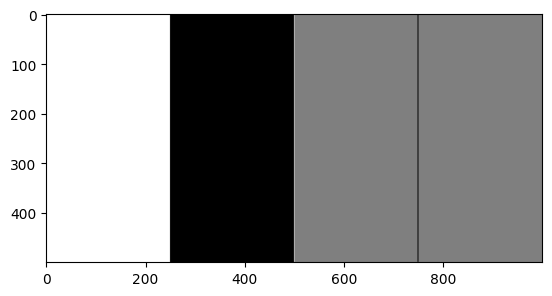

In [80]:
canvas=np.ones((500,500,3),dtype=np.uint16)*255
canvas[:,250:]=0

sobel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)

print(sobel)

canvas_gray=cv2.cvtColor(canvas,cv2.COLOR_BGR2GRAY)
img2=canvas_gray.astype(np.float32)
print(img2)
img2=(img2-img2.min())/(img2.max()-img2.min())
print(img2)
img2=torch.from_numpy(img2)
img2=img2.reshape(1,1,500,500)

sobel=sobel.reshape(1,1,3,3)
sobel=torch.from_numpy(sobel)
out=torch.nn.functional.conv2d(img2,sobel,padding="same")
out=out.numpy()

out=(out-out.min())/(out.max()-out.min())*255
out=out.reshape(500,500).astype(np.uint16)
print(out)
ret=np.hstack([canvas_gray,out])
plt.imshow(ret,cmap="gray")
